In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [229]:
df = pd.read_csv("data/cleaned_data.csv")

In [230]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [231]:
X = df.drop(columns=["average","total_score", "math_score"],axis=1)
Y = df["math_score"].round().astype(int)

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [232]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [233]:
num_featues = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(exclude="int").columns

In [234]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScalar", numeric_transformer, num_featues),
])

In [235]:
X = preprocessor.fit_transform(X)

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [237]:
def evalute_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [238]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "Decesion Tree": DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

models_list = []
r2_List = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae,model_train_mse,model_train_rmae,model_train_r2 = evalute_model(Y_train, Y_train_pred)    
    model_test_mae,model_test_mse,model_test_rmae,model_test_r2 = evalute_model(Y_test, Y_test_pred)  

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model Performace for Traing set")
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmae))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 Score: {:.4f}".format(model_train_r2))
    
    print("Model Performace for Test set")
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmae))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 Score: {:.4f}".format(model_test_r2))
    
    r2_List.append(model_test_r2)

    print("=" * 35)
    print("\n")

Linear Regression
Model Performace for Traing set
Root Mean Squared Error: 5.3231
Mean Absolute Error: 4.2667
R2 Score: 0.8743
Model Performace for Test set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 Score: 0.8804


Lasso
Model Performace for Traing set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 Score: 0.8071
Model Performace for Test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253


Ridge
Model Performace for Traing set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 Score: 0.8743
Model Performace for Test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806


KNeighbors Regressor
Model Performace for Traing set
Root Mean Squared Error: 5.7077
Mean Absolute Error: 4.5167
R2 Score: 0.8555
Model Performace for Test set
Root Mean Squared Error: 7.2530
Mean Absolute Error: 5.6210
R2 Score: 0.7838


Decesion Tree
Model Performace for Traing set
Root Mean Squared Error: 0.2795

In [239]:

pd.DataFrame(list(zip(models_list, r2_List)), columns=["Model Name", "R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoostRegressor,0.851632
8,AdaBoost Regressor,0.850576
5,Random Forest Regressor,0.848586
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighbors Regressor,0.783813
4,Decesion Tree,0.751539


# Liner Regression Model selected as per the evaluation. 

In [240]:
Lin_model = LinearRegression()
Lin_model = Lin_model.fit(X_train,Y_train)
y_pred = Lin_model.predict(X_test)
score = r2_score(Y_test,y_pred)*100
print("Accuracy Score for the model is %.2f" %score)

Accuracy Score for the model is 88.04


Text(0, 0.5, 'Predicted')

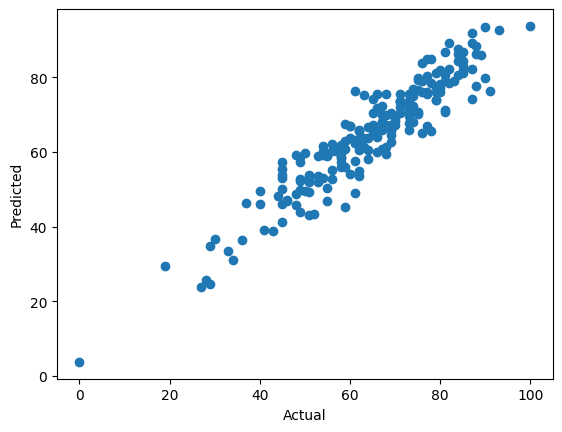

In [241]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

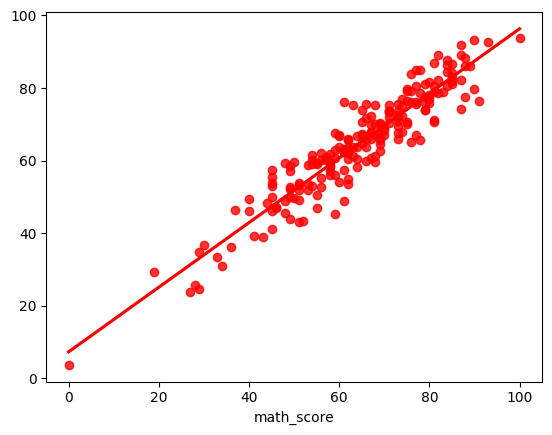

In [242]:
sns.regplot(x=Y_test, y =y_pred, ci=None, color="red")

In [244]:
pred_diff = pd.DataFrame({'Actual Values': Y_test, "Predicticted Values" : y_pred, "Difference": Y_test-y_pred})
pred_diff.head()

,Actual Values,Predicticted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
